In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def Sarsa(alpha, eps, gamma, n, stochastic,extra_action = False):
    if extra_action: 
        w = 9
    else:
        w = 8
    Q = np.zeros([w,7,10])
    start = [3,0]
    goal = [3,7]
    steps_arr =np.zeros(n)
    
    for k in range(n):
        if k > 5000 and k%100 == 0:                          #after 5000 runs we gradually lower our exploration rate
            eps = eps/2
        s = start
        steps = 0
        if np.random.rand() > eps:                           #the next few lines find the argmax and breaks ties randomly
            maxim = Q[0][tuple(s)]-5
            for i in range(w):
                if Q[i][tuple(s)] > maxim:
                    index = []
                    index.append(i)
                    maxim = Q[i][tuple(s)]
                elif Q[i][tuple(s)] == maxim:
                    index.append(i)
            a = index[np.random.randint(0,len(index)+0.5)]
        else:                                               #take random action  
            a = np.random.randint(0,w)
            
        while s!= goal:
            steps += 1
            
            #state we land in after taking action a
            if stochastic:
                s_next = action_eval_stochastic(a,s)
            else:
                s_next = action_eval(a,s)
            
            #Choose A' from S' epsilon-greedy
            if np.random.rand() > eps:
                maxim = Q[0][tuple(s_next)]-5
                for i in range(w):
                    if Q[i][tuple(s_next)] > maxim:
                        index = []
                        index.append(i)
                        maxim = Q[i][tuple(s_next)]
                    elif Q[i][tuple(s)] == maxim:
                        index.append(i)
                a_next = index[np.random.randint(0,len(index)+0.5)]
            else:
                a_next = np.random.randint(0,w)
            
            #Update rule from the book
            Q[a][tuple(s)] = Q[a][tuple(s)] + alpha*(-1+gamma*Q[a_next][tuple(s_next)]-Q[a][tuple(s)])
            
            s = s_next
            a = a_next
        steps_arr[k] = steps
            
    return Q,steps_arr

In [11]:
def action_eval(a,s):
    if s[1] == 3 or s[1] ==4 or s[1] == 5 or s[1] == 8:
        s = list(sum(z) for z in zip(s,take_action(a)))
        s[0]-=1
    elif s[1] == 6 or s[1] == 7:
        s = list(sum(z) for z in zip(s,take_action(a)))
        s[0]-=2
    else:
        s = list(sum(z) for z in zip(s,take_action(a)))
    #if we were to overshoot we instead stay at the edge
    if s[0]<0:
        s[0] =0
    if s[0] > 6:
        s[0] = 6
    if s[1]< 0:
        s[1] = 0
    if s[1] > 9:
        s[1] = 9
    return s

In [12]:
def action_eval_stochastic(a,s):
    k = np.random.randint(0,3)
    if s[1] == 3 or s[1] ==4 or s[1] == 5 or s[1] == 8:
        s = list(sum(z) for z in zip(s,take_action(a)))
        if k == 0:
            s[0]-=1
        elif k == 1:
            s[0]-=2
    elif s[1] == 6 or s[1] == 7:
        s = list(sum(z) for z in zip(s,take_action(a)))
        if k ==0:
            s[0]-=2
        elif k ==1:
            s[0]-=3
        elif k==2:
            s[0]-=1
    else:
        s = list(sum(z) for z in zip(s,take_action(a)))
    #if we were to overshoot we instead stay at the edge
    if s[0]<0:
        s[0] =0
    if s[0] > 6:
        s[0] = 6
    if s[1]< 0:
        s[1] = 0
    if s[1] > 9:
        s[1] = 9
    return s

In [13]:
def take_action(a): #actions ordered counter-clockwise starting with a=0 moving right
    if a == 0:
        return (0,1)
    if a == 1:
        return (-1,1)
    if a == 2:
        return (-1,0)
    if a == 3:
        return (-1,-1)
    if a == 4:
        return (0,-1)
    if a == 5:
        return (1,-1)
    if a == 6:
        return (1,0)
    if a == 7:
        return (1,1)
    if a == 8:
        return (0,0)

In [14]:
alpha = 0.5
gamma = 0.7
eps = 0.1
n = 8000
S,R = Sarsa(alpha, eps, gamma, n,False)

In [15]:
print(R[-100:-1])
print(S)

[7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7.]
[[[-3.24889765 -3.2419554  -3.26741566 -3.26809644 -3.25743948
   -3.23457994 -3.17071612 -3.15077821 -3.07317838 -3.00067997]
  [-3.23713202 -3.23906087 -3.2432074  -3.25045096 -3.2405636
   -3.20557681 -3.15653587 -3.13359619 -3.07061253 -2.9809163 ]
  [-3.23587744 -3.22106172 -3.25239302 -3.24221726 -3.25929359
   -3.23835887 -3.18707536 -3.12226058 -2.92740706 -2.67991048]
  [-3.20030964 -3.1984633  -3.23170684 -3.25042036 -3.2502208
   -3.20370004 -3.18029342  0.         -2.70541941 -2.28135375]
  [-3.21502718 -2.94117    -3.09361263 -3.25339276 -3.22838578
   -3.16117544 -3.07812351 -1.91068579 -2.55490881 -2.23928212]
  [-3.18716805 -3.13720731 -3.08556069 -2.86320808 -2.60389417
 

<IPython.core.display.Javascript object>


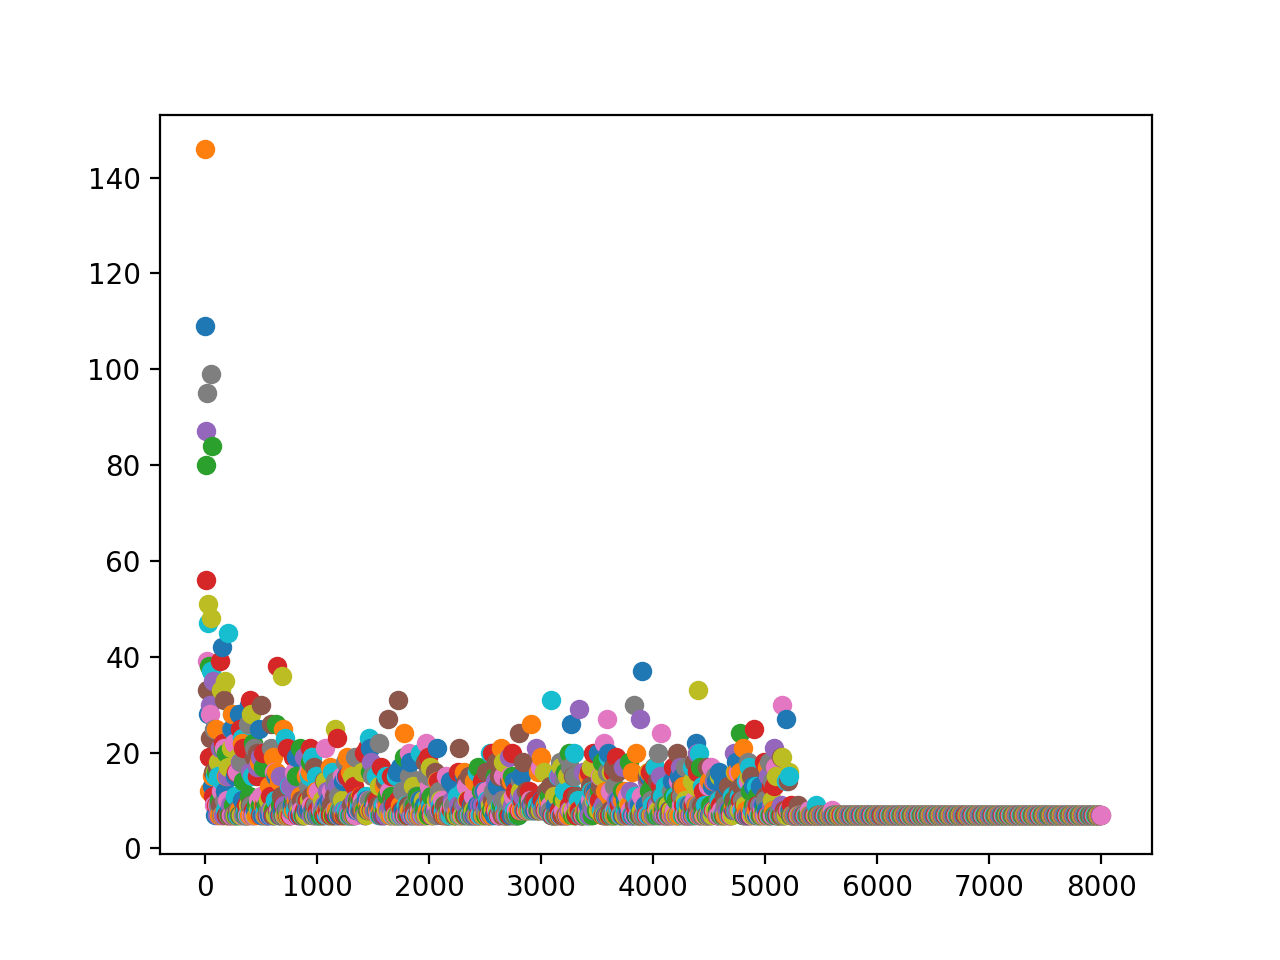

In [16]:
%matplotlib notebook

for i in range(n):
    if i%3 == 0:
        plt.scatter(i,R[i])